## 0. Install and Import Dependencies

In [1]:
!pip install mediapipe opencv-python pandas scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mediapipe as mp
import cv2 
import numpy as np

from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [3]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_pose = mp.solutions.pose

In [4]:
VIDEO_PATH = 'press.avi'
EXPORT_PATH = 'C:/Users/OS/Desktop/MediaPipe'
MODEL_PATH = 'hips.pkl'

## 1. Make Some Detections

In [48]:
import cv2
import mediapipe as mp

# Set the path to your local MP4 file
file_path = 'C:/Users/OS/Desktop/MediaPipe_Test/Punch.mp4'

# Initialize MediaPipe and VideoCapture
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)
output_file = 'output.avi'

# Initialize VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
videoWriter = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, image = cap.read()

        if not ret:
            break

        # Recolor Feed
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = pose.process(image)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

        cv2.imshow('Raw Webcam Feed', image)
        videoWriter.write(image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
videoWriter.release()
cv2.destroyAllWindows()


### 1.x Save Video

In [4]:
cap = cv2.VideoCapture(0)

height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
fps = cap.get(cv2.CAP_PROP_FPS)
videoWriter = cv2.VideoWriter('press.avi', cv2. VideoWriter_fourcc('P', 'I','M', '1'), fps, (int(width), int(height)))

while cap.isOpened():
    ret, frame = cap.read()

    try:
        cv2.imshow('Press', frame)
        videoWriter.write(frame)
    except Exception as e:
        print(f"Error: {str(e)}")
        break

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
videoWriter.release()
cv2.destroyAllWindows()

# 2. Capture Landmarks & Export to CSV

In [5]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt

In [6]:
landmarks = ['class']
for val in range(1, 33+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [10]:
landmarks[1:]

['x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 'x33',
 'y3

In [52]:
with open('punching.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [7]:
def export_landmark(results, action):
    try:
        keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist() 
        keypoints.insert(0, action)

        with open('punching.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        pass


In [8]:
results.pose_landmarks

NameError: name 'results' is not defined

In [ ]:
export_landmark(results, 'slapping')

In [54]:
cap = cv2.VideoCapture('output.avi')
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = pose.process(image)

        # Recolor image back to RGB for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
        #                         mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
        #                         mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                            # )
        k = cv2.waitKey(1)
        if k == ord('s'):
            export_landmark(results, 'slapping')
        if k == ord('n'):
            export_landmark(results, 'normal')

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
        

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('punching.csv')

In [10]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,normal,0.395424,0.149821,-0.565111,0.999937,0.402774,0.132929,-0.545900,0.999756,0.408503,...,0.259886,0.923598,0.500970,0.902665,0.035325,0.985443,0.347331,0.909315,0.095902,0.986652
1,normal,0.402398,0.151860,-0.546883,0.999939,0.410521,0.134927,-0.528790,0.999766,0.416239,...,0.236057,0.925324,0.503621,0.903922,0.044593,0.986093,0.346942,0.910284,0.071333,0.987319
2,normal,0.428337,0.151363,-0.567348,0.999943,0.436035,0.134890,-0.550504,0.999783,0.441612,...,0.248960,0.926828,0.500940,0.904182,0.090925,0.986776,0.346661,0.910338,0.077618,0.987949
3,normal,0.431651,0.152283,-0.543419,0.999944,0.439448,0.136268,-0.525225,0.999787,0.444875,...,0.251529,0.927043,0.500872,0.903836,0.084599,0.987278,0.346510,0.910519,0.087064,0.988352
4,normal,0.452878,0.151961,-0.560965,0.999946,0.459623,0.135873,-0.540684,0.999798,0.465061,...,0.246475,0.927554,0.501005,0.904516,0.110394,0.987769,0.347207,0.909714,0.081064,0.988826


In [10]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
3238,slapping,0.374499,0.060985,-0.383543,0.999810,0.384302,0.047521,-0.356072,0.999655,0.390023,...,0.246582,0.598547,0.364967,1.058571,0.150426,0.663650,0.176480,1.011549,0.058594,0.738067
3239,slapping,0.376246,0.044109,-0.379695,0.999810,0.386427,0.035519,-0.352338,0.999646,0.392485,...,0.248032,0.608874,0.366971,1.063643,0.179683,0.676509,0.180588,1.010637,0.050358,0.749379
3240,slapping,0.379270,0.030145,-0.358752,0.999825,0.389397,0.025199,-0.333066,0.999672,0.395699,...,0.284589,0.615903,0.372595,1.064723,0.243334,0.687685,0.184787,1.011352,0.090309,0.757084
3241,slapping,0.380666,0.032281,-0.365512,0.999838,0.390975,0.025978,-0.338435,0.999694,0.397199,...,0.259348,0.622516,0.378500,1.062664,0.272204,0.700591,0.192227,1.010925,0.060290,0.765001
3242,slapping,0.381526,0.033090,-0.453244,0.999849,0.391899,0.024967,-0.426656,0.999712,0.398159,...,0.272454,0.630790,0.378097,1.062072,0.269670,0.711959,0.202969,1.008427,0.065722,0.771375


In [11]:
df[df['class']=='slapping']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
1162,slapping,0.433275,0.141990,-0.371621,0.999966,0.441542,0.129729,-0.345741,0.999843,0.446509,...,0.326017,0.939160,0.507848,0.912471,0.186460,0.986448,0.362201,0.911529,0.165253,0.990452
1163,slapping,0.431520,0.140287,-0.381072,0.999978,0.439258,0.128394,-0.355280,0.999896,0.444359,...,0.381781,0.951610,0.505967,0.913509,0.169155,0.988141,0.362681,0.911840,0.214040,0.992252
1164,slapping,0.430823,0.139866,-0.358671,0.999979,0.438564,0.128287,-0.333418,0.999900,0.443648,...,0.363263,0.952809,0.505947,0.913106,0.171268,0.988352,0.363367,0.911776,0.203468,0.992457
1165,slapping,0.430758,0.137803,-0.360296,0.999980,0.438510,0.127272,-0.334835,0.999903,0.443574,...,0.353911,0.954055,0.505785,0.913109,0.166463,0.988643,0.363755,0.911630,0.195254,0.992675
1166,slapping,0.430327,0.137116,-0.363372,0.999981,0.438177,0.126783,-0.337513,0.999905,0.443305,...,0.359023,0.955151,0.505608,0.913065,0.172942,0.988871,0.363865,0.911609,0.201049,0.992865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238,slapping,0.374499,0.060985,-0.383543,0.999810,0.384302,0.047521,-0.356072,0.999655,0.390023,...,0.246582,0.598547,0.364967,1.058571,0.150426,0.663650,0.176480,1.011549,0.058594,0.738067
3239,slapping,0.376246,0.044109,-0.379695,0.999810,0.386427,0.035519,-0.352338,0.999646,0.392485,...,0.248032,0.608874,0.366971,1.063643,0.179683,0.676509,0.180588,1.010637,0.050358,0.749379
3240,slapping,0.379270,0.030145,-0.358752,0.999825,0.389397,0.025199,-0.333066,0.999672,0.395699,...,0.284589,0.615903,0.372595,1.064723,0.243334,0.687685,0.184787,1.011352,0.090309,0.757084
3241,slapping,0.380666,0.032281,-0.365512,0.999838,0.390975,0.025978,-0.338435,0.999694,0.397199,...,0.259348,0.622516,0.378500,1.062664,0.272204,0.700591,0.192227,1.010925,0.060290,0.765001


In [11]:
X = df.drop('class', axis=1)
y = df['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3000)

In [13]:
y_test

1384    slapping
483       normal
2506    slapping
561       normal
2008    slapping
          ...   
2564    slapping
834       normal
3019    slapping
833       normal
3075    slapping
Name: class, Length: 973, dtype: object

## 3.2 Train Machine Learning Classification Model

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [15]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [16]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [17]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [18]:
fit_models['rc'].predict(X_test)

array(['slapping', 'normal', 'slapping', 'normal', 'slapping', 'slapping',
       'slapping', 'normal', 'slapping', 'normal', 'slapping', 'normal',
       'slapping', 'slapping', 'normal', 'slapping', 'slapping',
       'slapping', 'normal', 'slapping', 'slapping', 'normal', 'slapping',
       'slapping', 'normal', 'normal', 'normal', 'normal', 'slapping',
       'normal', 'normal', 'slapping', 'normal', 'slapping', 'slapping',
       'normal', 'normal', 'normal', 'slapping', 'slapping', 'slapping',
       'slapping', 'slapping', 'slapping', 'slapping', 'normal',
       'slapping', 'slapping', 'slapping', 'slapping', 'normal',
       'slapping', 'slapping', 'slapping', 'slapping', 'normal', 'normal',
       'slapping', 'slapping', 'slapping', 'slapping', 'slapping',
       'slapping', 'slapping', 'normal', 'normal', 'slapping', 'slapping',
       'normal', 'slapping', 'normal', 'slapping', 'slapping', 'slapping',
       'slapping', 'normal', 'slapping', 'slapping', 'normal', 'normal',


## 3.3 Evaluate and Serial Model

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

In [20]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test.values, yhat), 
          precision_score(y_test.values, yhat, average="binary", pos_label="slapping"),
          recall_score(y_test.values, yhat, average="binary", pos_label="slapping"))

lr 0.9969167523124358 0.9967105263157895 0.9983525535420099
rc 0.9969167523124358 0.9967105263157895 0.9983525535420099
rf 0.9928057553956835 0.993421052631579 0.9950576606260296
gb 0.9938335046248715 0.9918166939443536 0.9983525535420099


In [21]:
yhat = fit_models['rf'].predict(X_test)

In [22]:
yhat[:10]

array(['slapping', 'normal', 'slapping', 'normal', 'slapping', 'slapping',
       'slapping', 'normal', 'slapping', 'normal'], dtype=object)

In [23]:
with open('deadlift.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# 4. Make Detections with Model

In [24]:
with open('deadlift.pkl', 'rb') as f:
    model = pickle.load(f)

In [25]:
X = pd.DataFrame([row], columns=landmarks[1:])

NameError: name 'row' is not defined

In [27]:
cap = cv2.VideoCapture("C:/Users/OS/Pictures/Camera Roll/16-11-2023.mp4")
counter = 0
current_stage = ''
# Initiate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = pose.process(image)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(245,117,230), thickness=2, circle_radius=2)
                                )

        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
        
    
            if body_language_class == 'slapping' and body_language_prob[body_language_prob.argmax()] >= .7:
                current_stage = 'slapping'
    
            ## not sure
            elif current_stage == 'slapping' and body_language_class == 'normal' and body_language_prob[body_language_prob.argmax()] < .7:
                current_stage="normal"
                counter += 1
                print(current_stage)

            # Get status box
            cv2.rectangle(image, (0,0), (300, 60), (245, 117, 16), -1)
    
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (130, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (125, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
            # Display Probability
            cv2.putText(image, 'COUNT'
                        , (250, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter)
                        , (245, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        
        except Exception as e:
            pass
    
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

slapping [0.37 0.63]
slapping [0.45 0.55]
slapping [0.46 0.54]
slapping [0.43 0.57]
slapping [0.48 0.52]
slapping [0.31 0.69]
slapping [0.3 0.7]
slapping [0.3 0.7]
slapping [0.31 0.69]
slapping [0.32 0.68]
slapping [0.32 0.68]
slapping [0.23 0.77]
slapping [0.23 0.77]
slapping [0.25 0.75]
slapping [0.32 0.68]
slapping [0.31 0.69]
slapping [0.35 0.65]
slapping [0.42 0.58]
normal [0.75 0.25]
normal [0.75 0.25]
normal [0.77 0.23]
normal [0.59 0.41]
normal
normal [0.56 0.44]
normal [0.63 0.37]
normal [0.59 0.41]
normal [0.55 0.45]
normal [0.57 0.43]
normal [0.52 0.48]
normal [0.5 0.5]
slapping [0.48 0.52]
slapping [0.49 0.51]
normal [0.5 0.5]
slapping [0.49 0.51]
slapping [0.49 0.51]
normal [0.51 0.49]
normal [0.51 0.49]
normal [0.5 0.5]
normal [0.51 0.49]
normal [0.54 0.46]
normal [0.55 0.45]
normal [0.54 0.46]
normal [0.55 0.45]
normal [0.67 0.33]
normal [0.59 0.41]
normal [0.59 0.41]
normal [0.6 0.4]
normal [0.6 0.4]
normal [0.61 0.39]
normal [0.64 0.36]
normal [0.61 0.39]
normal [0.6 0

In [27]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
714,0.467136,0.142144,-0.671694,0.999998,0.471101,0.127963,-0.610211,0.999990,0.476748,0.128754,...,0.566786,0.695832,0.420463,0.707884,0.348741,0.879103,0.357255,0.720300,0.328085,0.842957
475,0.667837,0.169028,-0.300352,0.999789,0.681124,0.155365,-0.275095,0.999353,0.690153,0.154329,...,0.606734,0.724346,0.792467,0.667940,0.076583,0.898110,0.651779,0.648494,0.429327,0.911406
366,0.576876,0.182227,-0.465660,0.999965,0.589916,0.169719,-0.439280,0.999911,0.599329,0.169119,...,0.670200,0.676821,0.698982,0.653606,0.104304,0.901752,0.557313,0.639736,0.468806,0.884317
746,0.481530,0.140057,-0.513151,0.999994,0.486077,0.126545,-0.469518,0.999972,0.492670,0.127489,...,0.396585,0.630713,0.457826,0.706891,0.286721,0.811731,0.370132,0.721978,0.225588,0.805373
330,0.560235,0.181366,-0.412827,0.999973,0.572795,0.168688,-0.382734,0.999922,0.581967,0.167664,...,0.508884,0.724202,0.702086,0.650721,0.092885,0.899326,0.571424,0.651273,0.318394,0.900388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.576116,0.180991,-0.661196,0.999920,0.588281,0.167371,-0.646786,0.999799,0.597358,0.166186,...,0.683739,0.787379,0.698253,0.655145,0.192105,0.925259,0.560326,0.652970,0.465681,0.923787
53,0.572813,0.156883,-0.579567,0.999967,0.586977,0.143330,-0.559711,0.999905,0.596410,0.142996,...,0.696414,0.760142,0.665816,0.631066,0.224033,0.930895,0.530099,0.624521,0.500386,0.921860
294,0.582124,0.178572,-0.433725,0.999950,0.595545,0.166313,-0.400334,0.999843,0.605417,0.165828,...,0.619783,0.735587,0.704910,0.654693,0.069138,0.922679,0.548029,0.644951,0.400625,0.910573
723,0.468719,0.142507,-0.618523,0.999998,0.474544,0.128079,-0.558823,0.999987,0.480267,0.128987,...,0.432348,0.658979,0.421856,0.707751,0.411994,0.874224,0.360218,0.721543,0.202635,0.830655


In [77]:
def describe_dataset(dataset_path: str):
    data = pd.read_csv(dataset_path)
    return data

def round_up_metric_results(results) -> list:
    '''Round up metrics results such as precision score, recall score, ...'''
    return list(map(lambda el: round(el, 3), results))

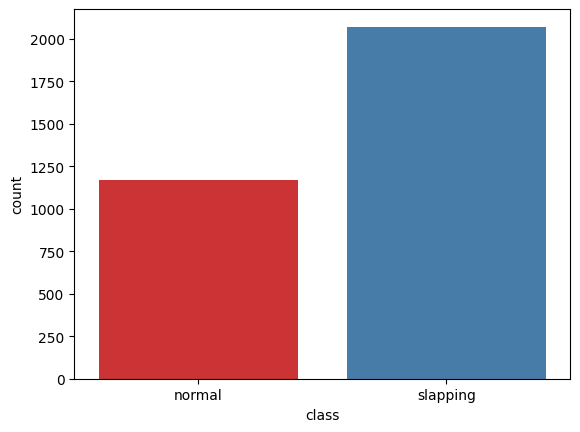

In [78]:
df = describe_dataset("./punching.csv")
sns.countplot(x='class', data=df, palette="Set1") 
df.loc[df["class"] == "slapping", "class"] = 0
df.loc[df["class"] == "normal", "class"] = 1

In [79]:
X = df.drop("class", axis=1)
y = df["class"].astype('int')

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [80]:
# Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
y_test.head(3)

316     1
730     1
2184    0
Name: class, dtype: int32

In [81]:
algorithms =[("LR", LogisticRegression()),
         ("SVC", SVC(probability=True)),
         ('KNN',KNeighborsClassifier()),
         ("DTC", DecisionTreeClassifier()),
         ("SGDC", CalibratedClassifierCV(SGDClassifier())),
         ("NB", GaussianNB()),
         ('RF', RandomForestClassifier()),]

models = {}
final_results = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model

    # Evaluate model
    model_results = model.predict(X_test)

    p_score = precision_score(y_test, model_results, average=None, labels=[0, 1])
    a_score = accuracy_score(y_test, model_results)
    r_score = recall_score(y_test, model_results, average=None, labels=[0, 1])
    f1_score_result = f1_score(y_test, model_results, average=None, labels=[0, 1])
    cm = confusion_matrix(y_test, model_results, labels=[0, 1])
    final_results.append(( name,  round_up_metric_results(p_score), a_score, round_up_metric_results(r_score), round_up_metric_results(f1_score_result), cm))

# Sort results by F1 score
final_results.sort(key=lambda k: sum(k[4]), reverse=True)
pd.DataFrame(final_results, columns=["Model", "Precision Score", "Accuracy score", "Recall Score", "F1 score", "Confusion Matrix"])


,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,LR,"[0.998, 1.0]",0.998459,"[1.0, 0.996]","[0.999, 0.998]","[[404, 0], [1, 244]]"
1,SVC,"[0.998, 1.0]",0.998459,"[1.0, 0.996]","[0.999, 0.998]","[[404, 0], [1, 244]]"
2,KNN,"[0.998, 0.996]",0.996918,"[0.998, 0.996]","[0.998, 0.996]","[[403, 1], [1, 244]]"
3,SGDC,"[0.998, 0.992]",0.995378,"[0.995, 0.996]","[0.996, 0.994]","[[402, 2], [1, 244]]"
4,RF,"[0.99, 1.0]",0.993837,"[1.0, 0.984]","[0.995, 0.992]","[[404, 0], [4, 241]]"
5,DTC,"[0.99, 0.992]",0.990755,"[0.995, 0.984]","[0.993, 0.988]","[[402, 2], [4, 241]]"
6,NB,"[0.992, 0.972]",0.984592,"[0.983, 0.988]","[0.988, 0.98]","[[397, 7], [3, 242]]"


In [82]:
test_df = describe_dataset("./punching.csv")
test_df.loc[test_df["class"] == "slapping", "class"] = 0
test_df.loc[test_df["class"] == "normal", "class"] = 1

test_x = test_df.drop("class", axis=1)
test_y = test_df["class"].astype("int")

In [83]:
testset_final_results = []

for name, model in models.items():

    model_results = model.predict(test_x)

    p_score = precision_score(test_y, model_results, average="weighted")
    a_score = accuracy_score(test_y, model_results)
    r_score = recall_score(test_y, model_results, average="weighted")
    f1_score_result = f1_score(test_y, model_results, average="weighted")
    cm = confusion_matrix(test_y, model_results, labels=[0, 1])
    testset_final_results.append(( name,  (p_score), a_score, (r_score), (f1_score_result), cm ))


testset_final_results.sort(key=lambda k: k[4], reverse=True)
eval_df = pd.DataFrame(testset_final_results, columns=["Model", "Precision score", "Accuracy score", "Recall score", "F1 score", "Confusion Matrix"])
eval_df = eval_df.sort_values(by=['F1 score'], ascending=False).reset_index(drop=True)
eval_df.to_csv(f"evaluation.csv", sep=',', encoding='utf-8', index=False)
eval_df

C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

,Model,Precision score,Accuracy score,Recall score,F1 score,Confusion Matrix
0,NB,0.953516,0.946654,0.946654,0.947325,"[[1898, 173], [0, 1172]]"
1,DTC,0.850914,0.746223,0.746223,0.747733,"[[1248, 823], [0, 1172]]"
2,SGDC,0.771361,0.643848,0.643848,0.509694,"[[2071, 0], [1155, 17]]"
3,RF,0.795711,0.530065,0.530065,0.485862,"[[547, 1524], [0, 1172]]"
4,LR,0.130605,0.361394,0.361394,0.191870,"[[0, 2071], [0, 1172]]"
5,SVC,0.130605,0.361394,0.361394,0.191870,"[[0, 2071], [0, 1172]]"
6,KNN,0.130605,0.361394,0.361394,0.191870,"[[0, 2071], [0, 1172]]"


In [85]:
# with open("./deadlift.pkl", "wb") as f:
#     pickle.dump(models, f)
with open("./deadlift.pkl", "wb") as f:
    pickle.dump(models["NB"], f)
# with open("./model/SGDC_model.pkl", "wb") as f:
#     pickle.dump(models["SGDC"], f)

In [86]:
best_model = models["NB"]
y_predictions = best_model.predict(test_x)

p_score = precision_score(test_y, y_predictions, labels=[0, 1], average=None)
r_score = recall_score(test_y, y_predictions, labels=[0, 1], average=None)
f1_score_result = f1_score(test_y, y_predictions, labels=[0, 1], average=None)

p_score, r_score, f1_score_result

C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


(array([1.        , 0.87137546]),
 array([0.91646548, 1.        ]),
 array([0.95641219, 0.93126738]))

<Axes: >

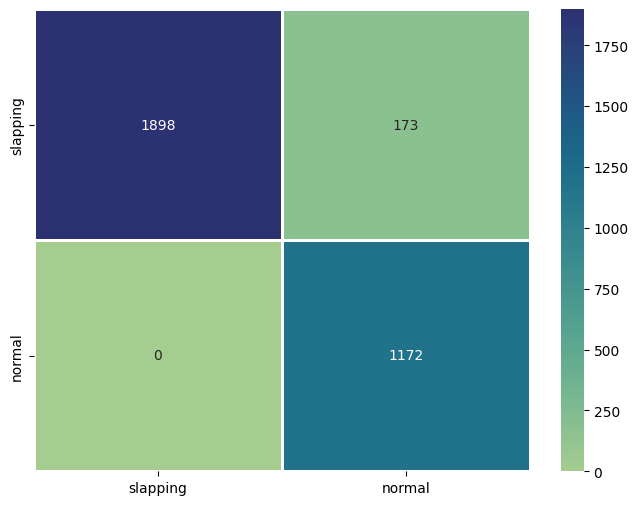

In [87]:
KNN_cm = eval_df[ eval_df["Model"] == 'NB' ]["Confusion Matrix"].values[0]

cm_array_df = pd.DataFrame(KNN_cm, index=["slapping", "normal"], columns=["slapping", "normal"])

fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(cm_array_df, linewidths=1, annot=True, ax=ax, fmt='g', cmap="crest")

In [80]:
def to_labels(y_pred, y_pred_proba, threshold):
    results = []

    for index, predicted_class in enumerate(y_pred):
        prediction_probabilities = y_pred_proba[index]
        class_prediction_probability = round(prediction_probabilities[np.argmax(prediction_probabilities)], 2)

        results.append(predicted_class if class_prediction_probability >= threshold else -1)
    
    return results


def calculate_correlation_score_confidence(test_x, test_y):
    y_predictions = best_model.predict(test_x)
    y_predict_proba = best_model.predict_proba(test_x)

    thresholds = list(np.arange(0, 1.05, 0.01))

    f1_score_results = []

    for threshold in thresholds:
        true_predictions = to_labels(y_predictions, y_predict_proba, threshold)
        f1_s = list(f1_score(test_y, true_predictions, labels=[0, 1], average=None))
        all_class_f1 = f1_score(test_y, true_predictions, labels=[0, 1], average="weighted")
        f1_s.append(all_class_f1)
        f1_score_results.append(f1_s)
    
    return thresholds, f1_score_results

C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


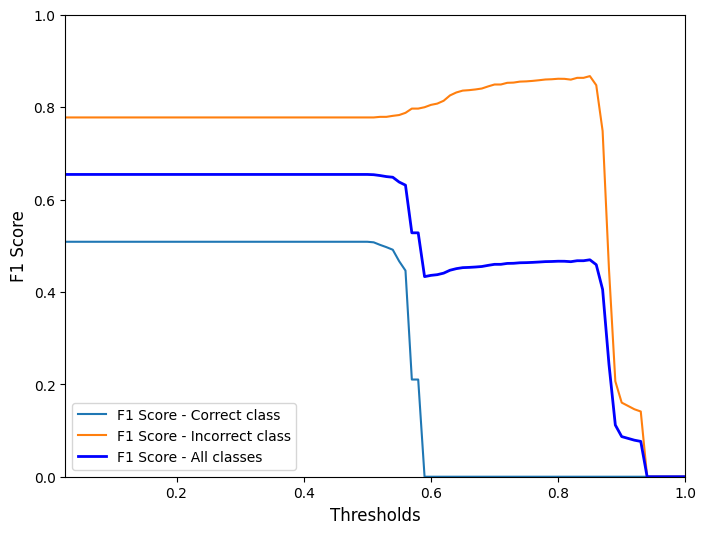

In [81]:
thresholds, f1_scores = calculate_correlation_score_confidence(test_x, test_y)

first_class = [ el[0] for el in f1_scores ]
second_class = [ el[1] for el in f1_scores ]
all_classes = [ el[2] for el in f1_scores ]

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(thresholds, first_class, label = "F1 Score - Correct class")
plt.plot(thresholds, second_class, label = "F1 Score - Incorrect class")
plt.plot(thresholds, all_classes, label = "F1 Score - All classes", linewidth=2.0, color="blue")
plt.legend(loc = 'lower left')
plt.ylim([0, 1])
plt.xlim([0.025, 1])
plt.xlabel("Thresholds", fontsize = 12)
plt.ylabel("F1 Score", fontsize = 12)
# plt.axvline(thresholds[np.argmin(abs(precision-recall))], color="k", ls = "--")
# plt.title(label = F"Threshold = {thresholds[np.argmin(abs(precision-recall))]:.3f}", fontsize = 12)
plt.show()

Optimal Threshold: 0.86


C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


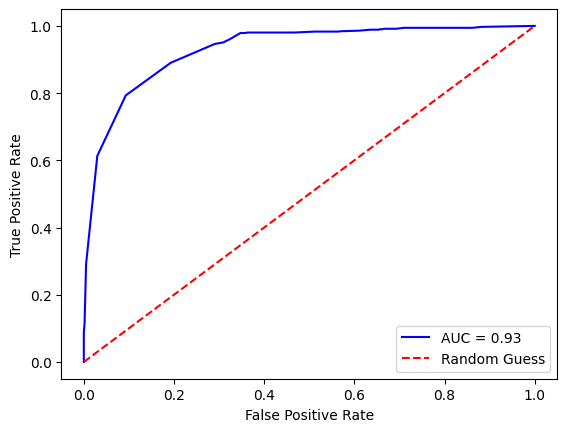

In [82]:
probs = best_model.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="Random Guess")
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()